In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [232]:
df_5 = pd.read_csv('./vrp_result_5x5_30_2023-12-06.csv')
df_10 = pd.read_csv('./vrp_result_10x10_30_2023-12-06.csv')
df_15 = pd.read_csv('./vrp_result_15x15_30_2023-12-06.csv')
df_20 = pd.read_csv('./vrp_result_20x20_30_2023-12-06.csv')
df_25 = pd.read_csv('./vrp_result_25x25_30_2023-12-06.csv')
df_ex = pd.read_csv('./vrp_result_all.csv') 

# concat
# df_ex = pd.concat([df_5, df_10, df_15, df_20, df_25])
# df_ex['id'] = np.array([i for i in range(1, 151) for j in range(4)])
# df_ex

<AxesSubplot: xlabel='id', ylabel='travel_time'>

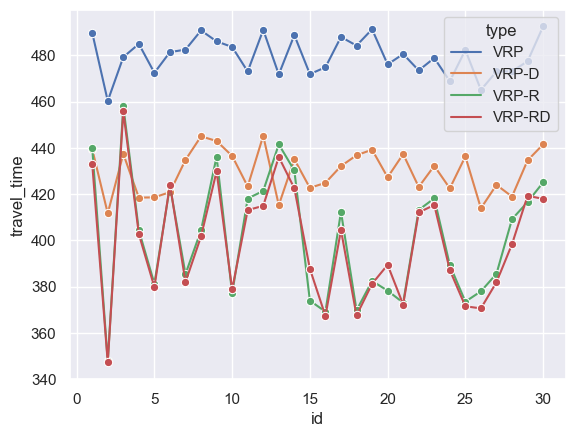

In [102]:
sns.lineplot(data=df_25, x='id', y='travel_time', hue='type', marker='o')

Text(0, 0.5, 'Type')

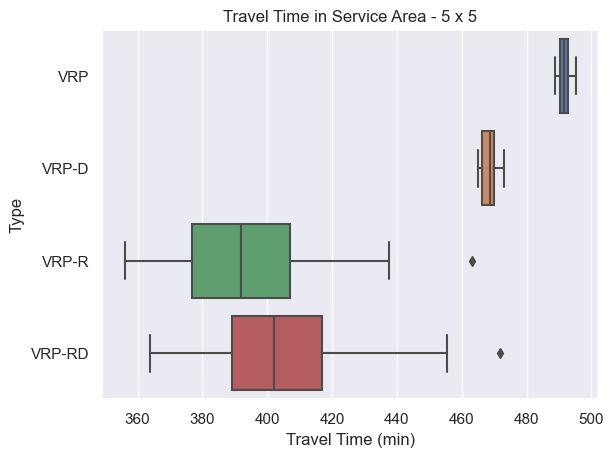

In [193]:
sns.boxplot(data=df_5, x='travel_time', y='type')
plt.title('Travel Time in Service Area - 5 x 5')
plt.xlabel('Travel Time (min)')
plt.ylabel('Type')

Text(0, 0.5, 'Type')

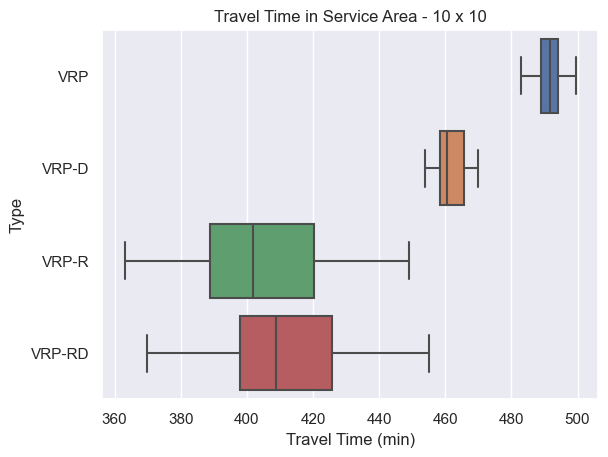

In [194]:
sns.boxplot(data=df_10, x='travel_time', y='type')
plt.title('Travel Time in Service Area - 10 x 10')
plt.xlabel('Travel Time (min)')
plt.ylabel('Type')

Text(0, 0.5, 'Type')

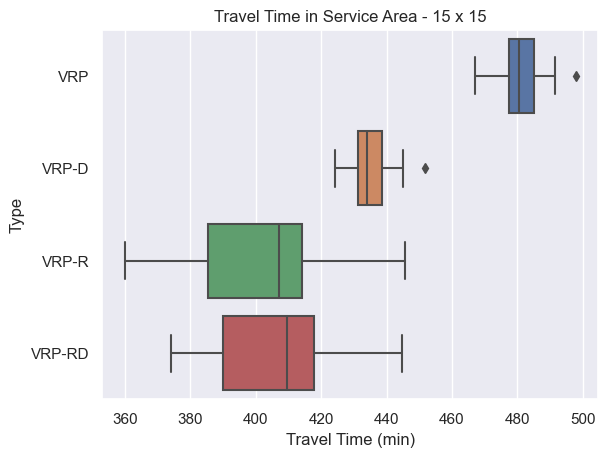

In [195]:
sns.boxplot(data=df_15, x='travel_time', y='type')
plt.title('Travel Time in Service Area - 15 x 15')
plt.xlabel('Travel Time (min)')
plt.ylabel('Type')

Text(0, 0.5, 'Type')

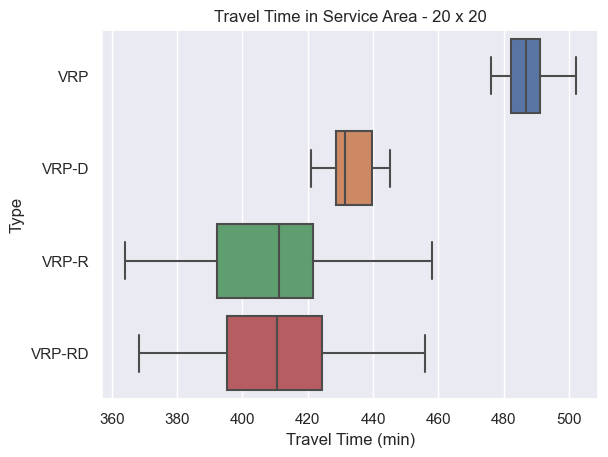

In [196]:
sns.boxplot(data=df_20, x='travel_time', y='type')
plt.title('Travel Time in Service Area - 20 x 20')
plt.xlabel('Travel Time (min)')
plt.ylabel('Type')

Text(0, 0.5, 'Type')

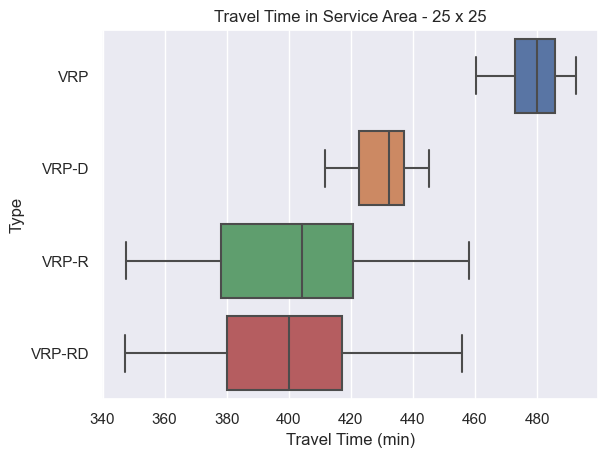

In [198]:
sns.boxplot(data=df_25, x='travel_time', y='type')
plt.title('Travel Time in Service Area - 25 x 25')
plt.xlabel('Travel Time (min)')
plt.ylabel('Type')

In [235]:
from pandas.api.types import CategoricalDtype

grouped = pd.DataFrame(df_ex.groupby(['type','map_size'])['travel_time'].mean().round(2)).reset_index()

cat_type = CategoricalDtype(categories=['(5, 5)', '(10, 10)', '(15, 15)', '(20, 20)', '(25, 25)'], ordered=True)
grouped['map_size'] = grouped['map_size'].astype(cat_type)
grouped = grouped.sort_values(['type', 'map_size'])
grouped

,type,map_size,travel_time
4,VRP,"(5, 5)",491.50
0,VRP,"(10, 10)",491.53
1,VRP,"(15, 15)",481.31
2,VRP,"(20, 20)",486.97
3,VRP,"(25, 25)",479.54
9,VRP-D,"(5, 5)",468.51
5,VRP-D,"(10, 10)",461.62
6,VRP-D,"(15, 15)",435.07
7,VRP-D,"(20, 20)",433.22
8,VRP-D,"(25, 25)",429.71


In [239]:
grouped.groupby(['type'])['travel_time'].mean()

type
VRP       486.170
VRP-D     445.626
VRP-R     402.046
VRP-RD    405.984
Name: travel_time, dtype: float64

In [236]:
grouped.to_csv('./avg_travel_time_by_type.csv', index=False)

Text(0, 0.5, 'Travel Time')

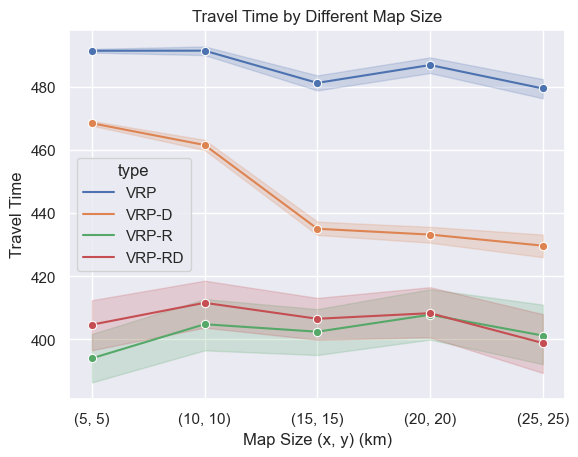

In [238]:
sns.lineplot(data=df_ex, x='map_size', y='travel_time', hue='type', marker='o')
plt.title('Travel Time by Different Map Size')
plt.xlabel('Map Size (x, y) (km)')
plt.ylabel('Travel Time')

Text(0, 0.5, 'Travel Time')

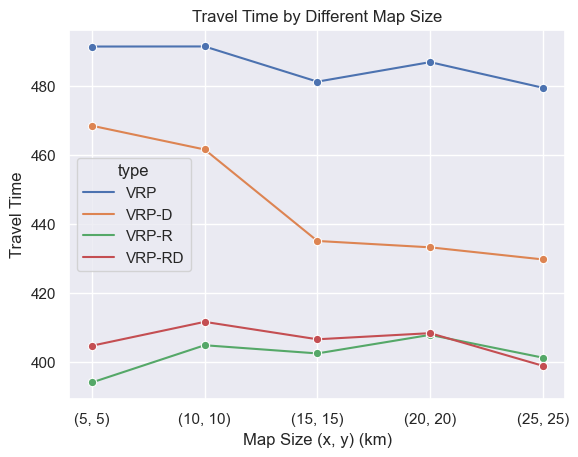

In [205]:
sns.lineplot(data=grouped, x='map_size', y='travel_time', hue='type', marker='o')
plt.title('Travel Time by Different Map Size')
plt.xlabel('Map Size (x, y) (km)')
plt.ylabel('Travel Time')

In [ ]:
'''
觀察 VRP-R 與 VRP-RD 的縮小原因:
1. 地圖變大、Node 變小的情況下，使用 Drone 服務較遠的點有助於配送效率改善
2. Drone 不適合密集的區域，可能會多次放沒多久又要回收，故在 Node 變少、平均密度降低的情況下顯著改善配送效率
'''

In [233]:
df_ex

,id,map_size,num_nodes,num_locations,num_vehicles,vehicle_capacities,type,truck_routes,drone_routes,robot_routes,distances,time,waiting,dispatch,total_distance,travel_time,time_complexity,space_complexity
0,1,"(5, 5)",210,"[(2.5, 2.5), (4.947, 3.071), (3.308, 2.931), (...",1,[210],VRP,"[[0, 22, 192, 10, 66, 161, 186, 136, 149, 141,...",NaN,NaN,[71461],[491.461],NaN,NaN,71461,491.461,3.4456,4.9473
1,1,"(5, 5)",210,"[(2.5, 2.5), (4.947, 3.071), (3.308, 2.931), (...",1,[210],VRP-D,"[[0, 22, 192, 10, 66, 161, 186, 136, 149, 141,...","[[[83, 78, 169], [62, 159, 129], [132, 34, 191...",NaN,[66541],[468.401],[15.86],[34],66541,468.401,3.9492,9.0293
2,1,"(5, 5)",210,"[(2.5, 2.5), (4.947, 3.071), (3.308, 2.931), (...",1,[210],VRP-R,"[[0, 106, 29, 79, 63, 68, 81, 109, 89, 32, 64,...",NaN,"[[[93, 8, 165, 146, 113, 197, 168, 67, 11, 103...",[60636],[391.501],[54.865],[16],60636,391.501,3.3019,23.9941
3,1,"(5, 5)",210,"[(2.5, 2.5), (4.947, 3.071), (3.308, 2.931), (...",1,[210],VRP-RD,"[[0, 106, 29, 79, 63, 68, 81, 109, 89, 32, 64,...","[[[83, 78, 169], [62, 159, 129], [26, 76, 87],...","[[[93, 8, 165, 146, 113, 197, 168, 67, 11, 103...",[57243],[401.251],[68.008],[36],57243,401.251,4.0676,18.9150
4,2,"(5, 5)",210,"[(2.5, 2.5), (4.74, 1.698), (0.735, 4.262), (0...",1,[210],VRP,"[[0, 193, 95, 191, 53, 198, 167, 136, 88, 91, ...",NaN,NaN,[70735],[490.735],NaN,NaN,70735,490.735,6.2699,4.4912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,149,"(25, 25)",110,"[(12.5, 12.5), (15.699, 23.301), (10.525, 15.9...",1,[110],VRP-RD,"[[0, 3, 93, 106, 104, 69, 12, 102, 61, 54, 20,...","[[[92, 41, 76], [85, 31, 98], [69, 109, 12], [...","[[[12, 38, 17, 74, 35, 65, 64, 42, 68, 62, 30,...",[211269],[419.239],[59.97],[30],211269,419.239,3.9921,11.3838
596,150,"(25, 25)",110,"[(12.5, 12.5), (0.691, 8.991), (15.644, 24.792...",1,[110],VRP,"[[0, 21, 67, 49, 72, 73, 8, 70, 3, 6, 88, 7, 2...",NaN,NaN,[272472],[492.472],NaN,NaN,272472,492.472,6.1487,3.3037
597,150,"(25, 25)",110,"[(12.5, 12.5), (0.691, 8.991), (15.644, 24.792...",1,[110],VRP-D,"[[0, 21, 67, 49, 73, 70, 3, 88, 7, 28, 26, 25,...","[[[73, 8, 70], [25, 62, 59], [20, 30, 19], [46...",NaN,[248862],[441.46],[8.598],[36],248862,441.460,5.6690,4.5576
598,150,"(25, 25)",110,"[(12.5, 12.5), (0.691, 8.991), (15.644, 24.792...",1,[110],VRP-R,"[[0, 21, 67, 49, 72, 73, 8, 70, 3, 6, 88, 9, 6...",NaN,"[[[39, 65, 50, 63, 80, 104, 68, 51, 96, 40, 12...",[227178],[425.032],[67.854],[10],227178,425.032,5.2704,11.3516
